# Liver Disease Prediction Analysis
by Maria Pinto
## Executive Summary

The objective of this analysis is to predict liver disease status in patients based on various health metrics. Using a dataset of 583 patient records with features such as age, gender, and several biochemical markers, we explored, cleaned, and modeled the data to develop predictive models. The Random Forest Classifier was chosen as the final model due to its balance of accuracy and interpretability, achieving an AUC-ROC of 0.78. The report also addresses the impact of class imbalance, feature importance, and model evaluation metrics, with recommendations for improving predictive performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

# 1. Introduction



#### Objective
* To develop a model that can predict liver disease based on health metrics, providing insights that may help in early detection and intervention.

#### Dataset
* Source: The dataset includes 583 records of liver function test results.
* Features: Age, gender, and 8 biochemical markers indicative of liver health, including Total Bilirubin, Alkaline Phosphatase, Albumin, and others.
* Target Variable: The Dataset column, where 1 represents liver disease and 2 indicates no liver disease.

# 2. Data Understanding

* Demographic Data: Age, Gender.
* Biochemical Markers: Total Bilirubin, Direct Bilirubin, Alkaline Phosphatase, Alamine Aminotransferase, Aspartate Aminotransferase, Total Proteins, Albumin, and Albumin and Globulin Ratio.

In [5]:
# Define a dictionary with feature descriptions
data_dict = {
    'Age': 'Age of the patient in years',
    'Gender': 'Gender of the patient (0: Female, 1: Male)',
    'Total_Bilirubin': 'Total bilirubin level, indicative of liver function',
    'Direct_Bilirubin': 'Direct bilirubin level, helps in diagnosing jaundice type',
    'Alkaline_Phosphotase': 'Alkaline phosphatase level, elevated in liver disease',
    'Alamine_Aminotransferase': 'Enzyme indicating liver inflammation or damage',
    'Aspartate_Aminotransferase': 'Another liver enzyme, often elevated in liver disease',
    'Total_Protiens': 'Total protein level, lower in chronic liver disease',
    'Albumin': 'Albumin level, a protein produced by the liver',
    'Albumin_and_Globulin_Ratio': 'Ratio between albumin and globulin proteins, lower in liver disease',
    'Dataset': 'Target variable (1: liver disease, 2: no liver disease)'
}

# Convert to DataFrame for easy viewing and exporting
data_dict_df = pd.DataFrame(list(data_dict.items()), columns=['Feature', 'Description'])
display(data_dict_df)


,Feature,Description
0,Age,Age of the patient in years
1,Gender,"Gender of the patient (0: Female, 1: Male)"
2,Total_Bilirubin,"Total bilirubin level, indicative of liver fun..."
3,Direct_Bilirubin,"Direct bilirubin level, helps in diagnosing ja..."
4,Alkaline_Phosphotase,"Alkaline phosphatase level, elevated in liver ..."
5,Alamine_Aminotransferase,Enzyme indicating liver inflammation or damage
6,Aspartate_Aminotransferase,"Another liver enzyme, often elevated in liver ..."
7,Total_Protiens,"Total protein level, lower in chronic liver di..."
8,Albumin,"Albumin level, a protein produced by the liver"
9,Albumin_and_Globulin_Ratio,"Ratio between albumin and globulin proteins, l..."


In [6]:
df = pd.read_csv('indian_liver_patient.csv')
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


# 3. Data Cleaning

In [12]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [14]:
df = df.astype({col:'float64' for col in df.select_dtypes('int64').columns})

df.dtypes

Age                           float64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase          float64
Alamine_Aminotransferase      float64
Aspartate_Aminotransferase    float64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                       float64
dtype: object

### 3.1) Handling Missing Values:
Missing values were found in the Albumin_and_Globulin_Ratio column. These were filled with the median value.

In [17]:
null_values = df.isnull().sum()
null_values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [19]:
# Fill missing values in `Albumin_and_Globulin_Ratio` with the median of the column
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(), inplace=True)
null_values = df.isnull().sum()
null_values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [21]:
 # Check for NaN values in each column
na_counts = df.isna().sum()
na_counts

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### 3.2) Outlier Detection and Treatment

 * Outliers were detected in several features (e.g., Total Bilirubin, Alkaline Phosphatase) using the Interquartile Range (IQR) method. These outliers were removed to improve model stability, reducing the dataset from 583 to 331 records.
* Visualization: Box plots were used to visualize the feature distributions before and after outlier removal, confirming that the data was less skewed post-treatment.

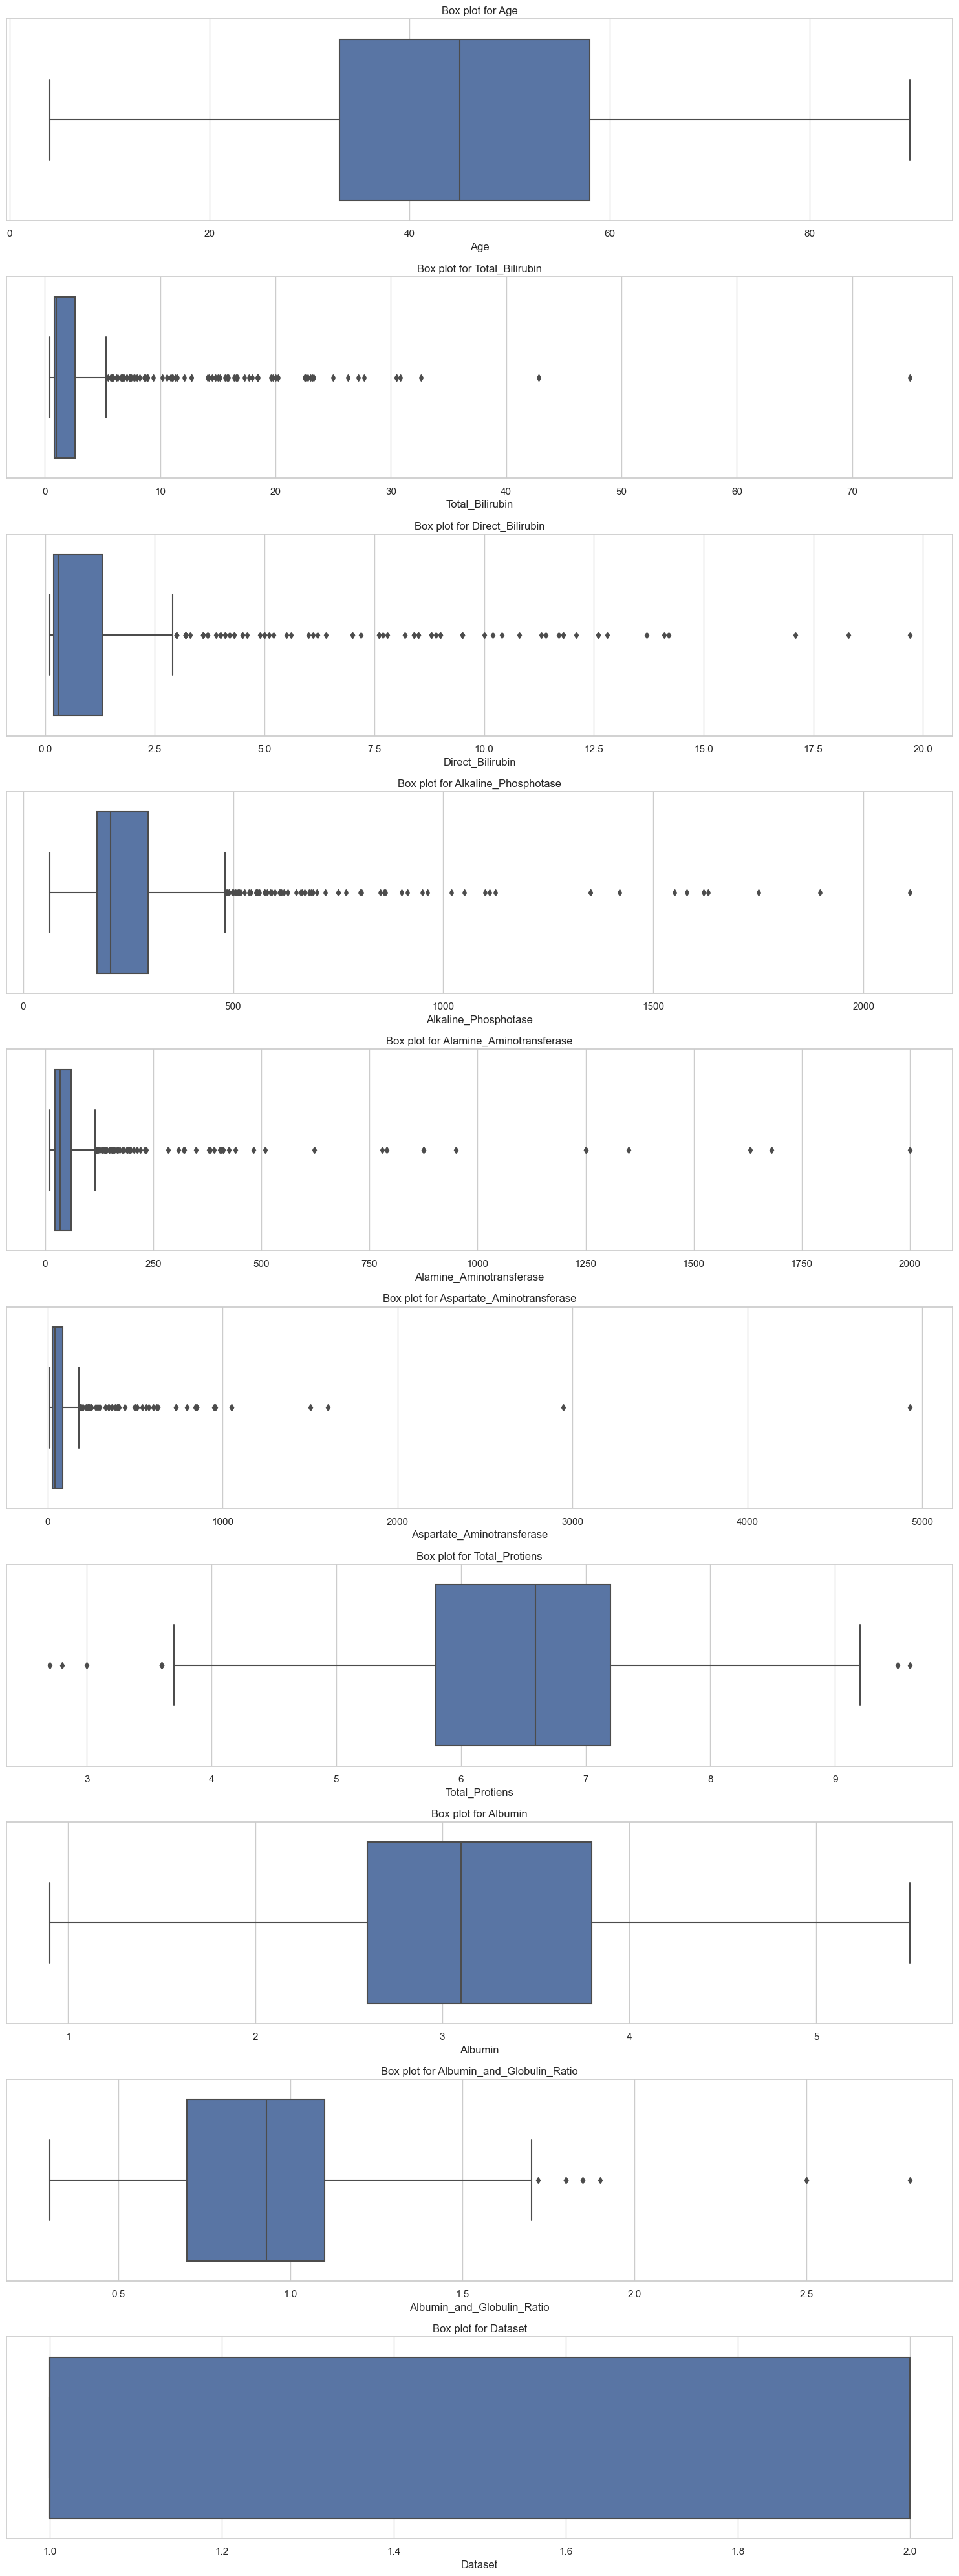

In [24]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot each numeric column in a separate box plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, len(numeric_columns) * 4))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box plot for {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Original data shape: (583, 11)
Data shape after outlier removal: (331, 11)


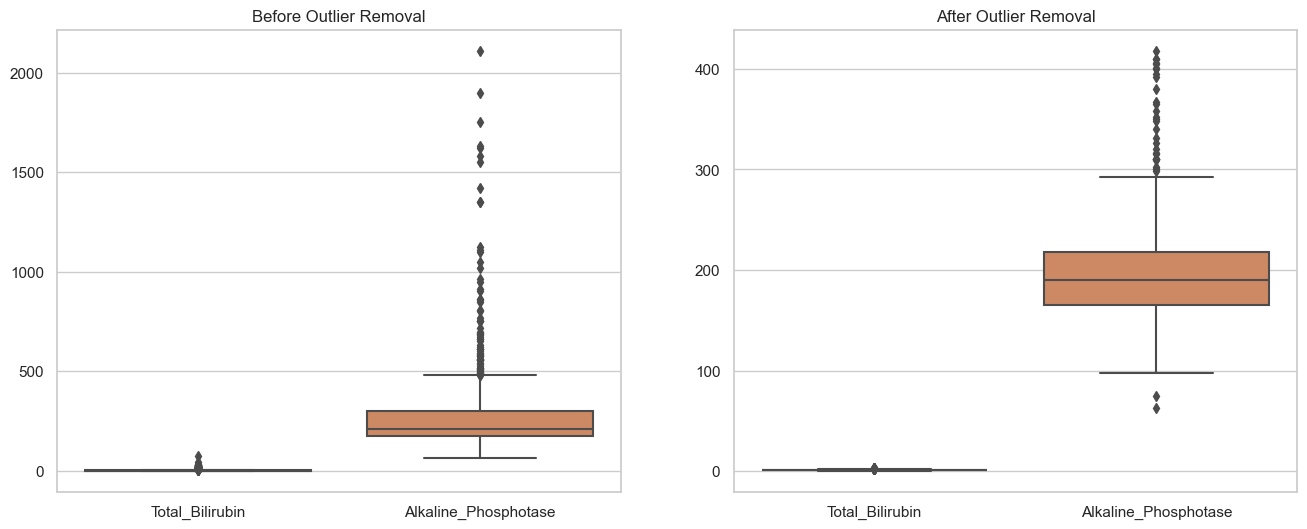

In [25]:

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Applying outlier removal and store original and cleaned data counts
cleaned_df = df.copy()
for col in df.select_dtypes(include=np.number).columns:
    cleaned_df = remove_outliers(cleaned_df, col)

print("Original data shape:", df.shape)
print("Data shape after outlier removal:", cleaned_df.shape)

# Box plots before and after outlier removal for key features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=df[['Total_Bilirubin', 'Alkaline_Phosphotase']], ax=axes[0])
axes[0].set_title('Before Outlier Removal')
sns.boxplot(data=cleaned_df[['Total_Bilirubin', 'Alkaline_Phosphotase']], ax=axes[1])
axes[1].set_title('After Outlier Removal')
plt.show()


###  Dataset Summary Table
Plot the distribution of the Dataset column (target variable) to show how balanced or imbalanced the dataset is regarding liver disease cases.

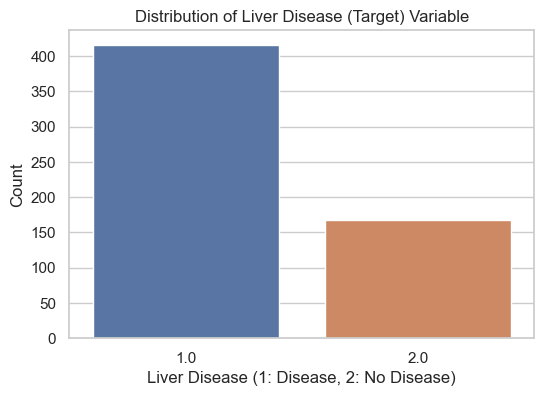

In [29]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Dataset', data=df)
plt.title("Distribution of Liver Disease (Target) Variable")
plt.xlabel("Liver Disease (1: Disease, 2: No Disease)")
plt.ylabel("Count")
plt.show()

# 4. Exploratory Data Analysis (EDA)

### 4.1 Univariate Analysis

* Histograms: Plotted for each numeric feature to understand distributions.
* Findings: Most liver enzyme levels were right-skewed, suggesting that log transformation could help stabilize variance.

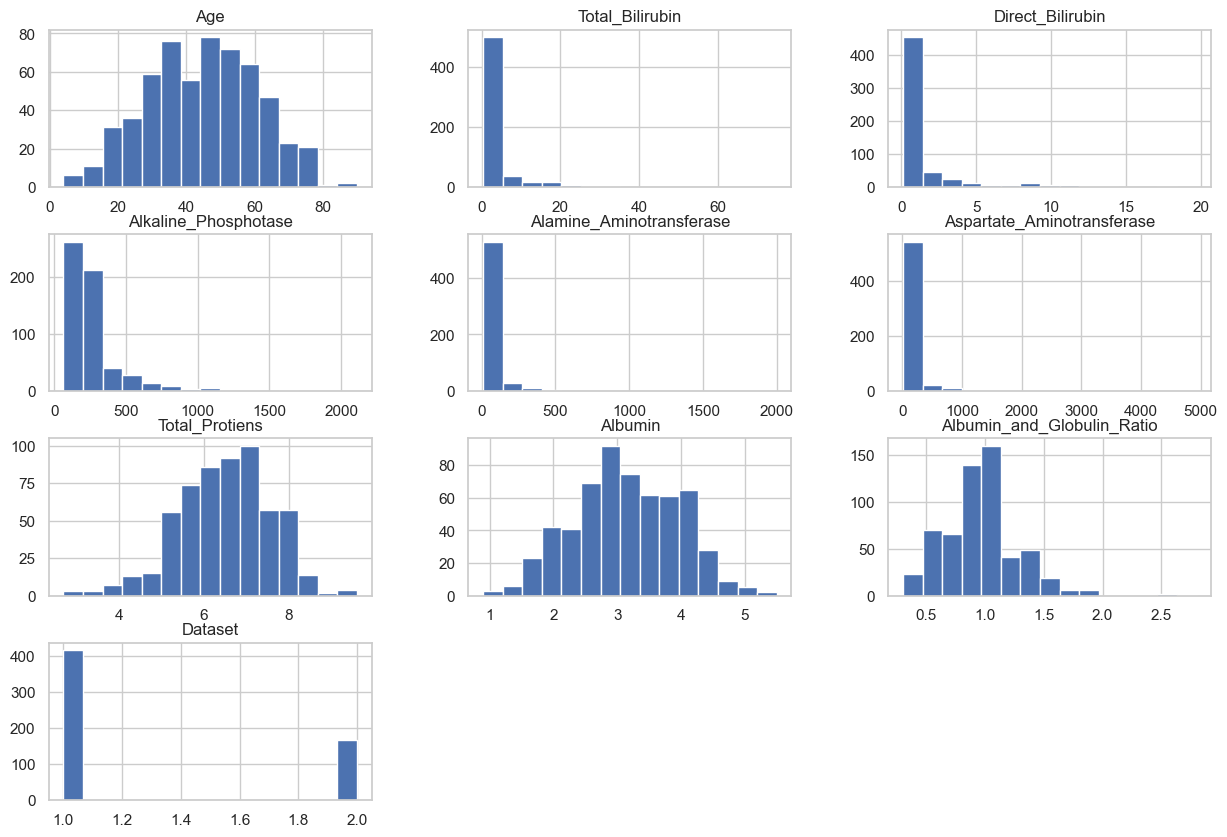

In [32]:
# Plot distributions for each numeric column
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.show()

### 4.2 Bivariate Analysis (Correlation Matrix)

* Correlation Matrix: Displayed correlations between features, with significant positive correlations found between related liver enzymes.
* Key Insight: High correlations between certain enzymes suggest potential collinearity, which may impact model performance.


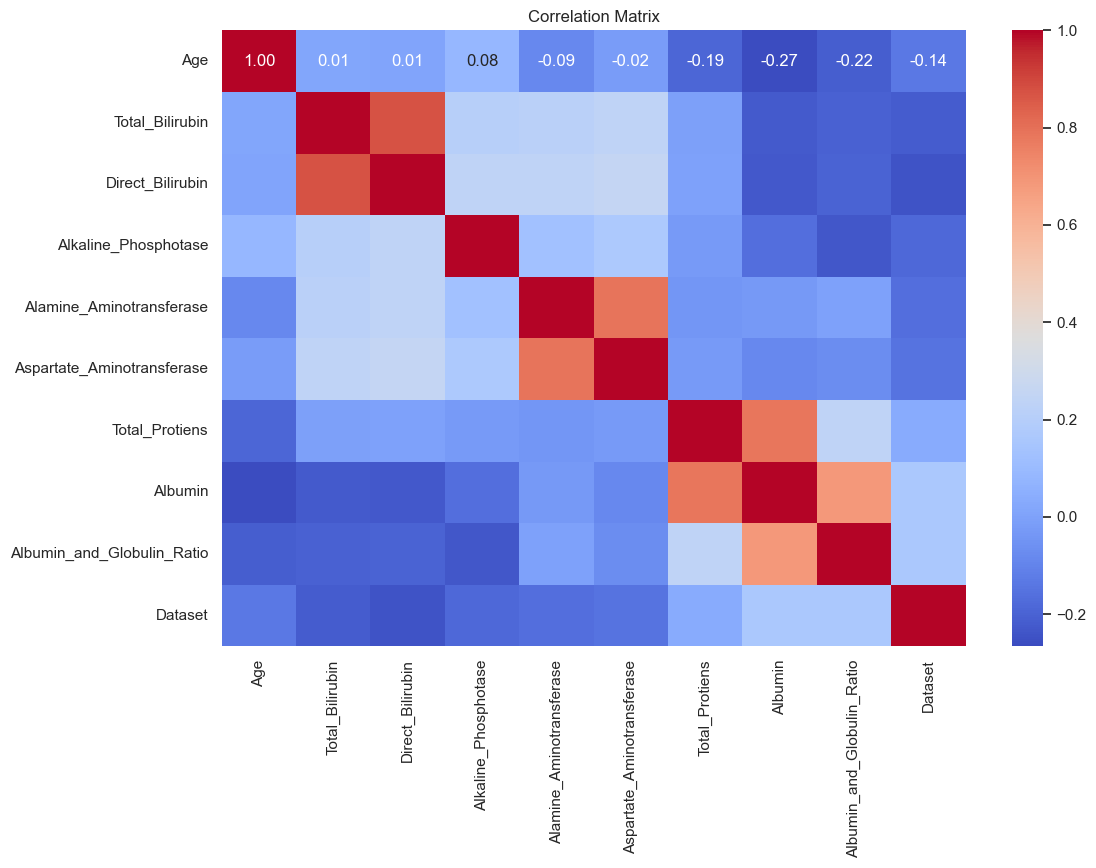

Correlation of features with target variable (Dataset):
 Dataset                       1.000000
Albumin_and_Globulin_Ratio    0.162144
Albumin                       0.161388
Total_Protiens                0.035008
Age                          -0.137351
Aspartate_Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline_Phosphotase         -0.184866
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Name: Dataset, dtype: float64


In [39]:
# Now select only numeric columns, excluding 'Gender' if it's not mapped
numeric_df = df.select_dtypes(include=[float, int])

# Display correlation matrix for only numeric columns (excluding Gender)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Calculate correlation of each feature with the target variable (excluding Gender)
target_corr = numeric_df.corr()['Dataset'].sort_values(ascending=False)
print("Correlation of features with target variable (Dataset):\n", target_corr)


### 4.3) Detailed EDA with Pair Plots

* Pair Plots: Displayed relationships between key features, colored by disease status, which revealed that some features show clustering by disease status.
* Box Plots by Target Variable: Highlighted differences in liver function metrics between diseased and non-diseased patients.

We used pair plots to explore relationships between important features (e.g., Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphatase) and the target variable. Pair plots show pairwise relationships and can highlight clusters or separability between classes.

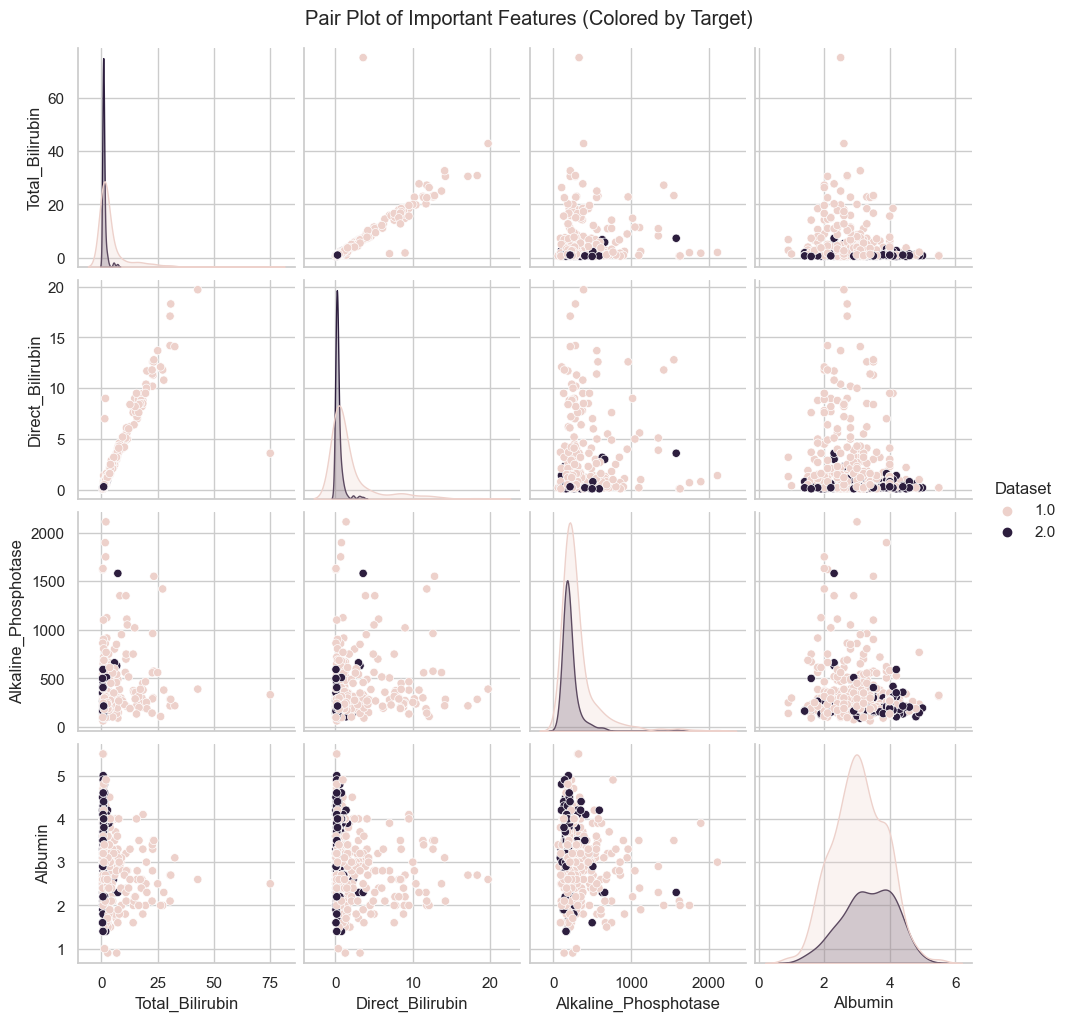

In [42]:
# Pair plot for important features
sns.pairplot(df, hue="Dataset", vars=['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Albumin'])
plt.suptitle("Pair Plot of Important Features (Colored by Target)", y=1.02)
plt.show()


### 4.4 Box Plots Grouped by Target Variable
Create box plots of key features grouped by the target variable to see if there are any visible differences between patients with and without liver disease.

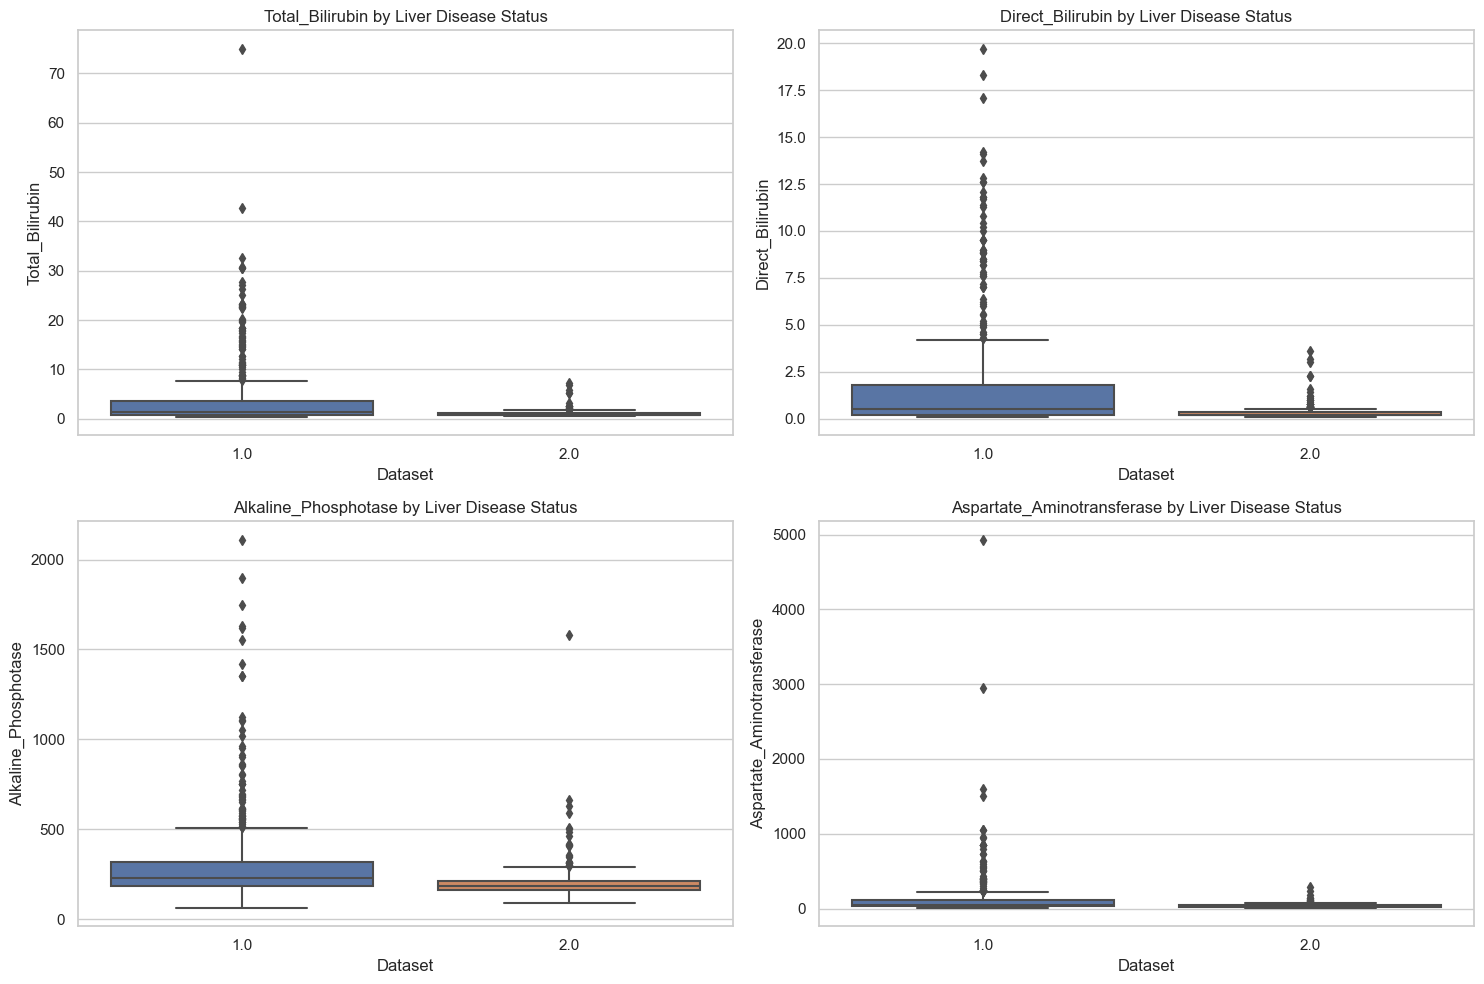

In [45]:
# Box plots grouped by target variable
features = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Dataset', y=feature, data=df)
    plt.title(f"{feature} by Liver Disease Status")
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

# 5. Data Preprocessing

 ### 5.1) Encoding Categorical Variables
 The Gender column was mapped to numeric values (0: Female, 1: Male) for compatibility with machine learning algorithms.

In [51]:
# Map 'Gender' column to numeric values (e.g., 0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Convert 'Gender' column to float
df['Gender'] = df['Gender'].astype(float)

### 5.2) Feature Scaling
All features were standardized using StandardScaler to ensure that features with larger scales (e.g., Alkaline Phosphatase) did not dominate model training.

In [54]:
# Separate features and target variable
X = df.drop('Dataset', axis=1)
y = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)  # Convert to binary (1 for disease, 0 for no disease)

# Standardize the feature columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


### 5.3) Addressing Skewness
Log transformation was applied to right-skewed features (e.g., Total Bilirubin, Alkaline Phosphatase) to reduce skewness and improve model performance.

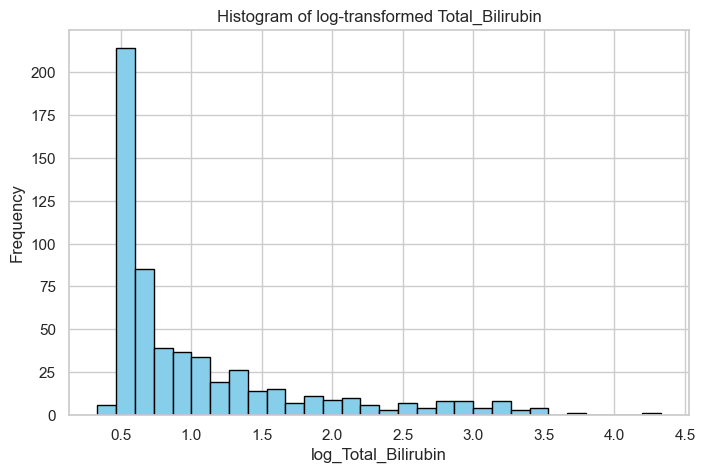

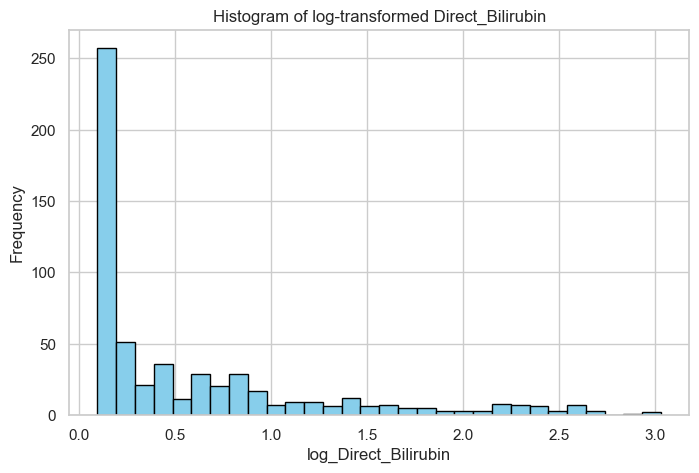

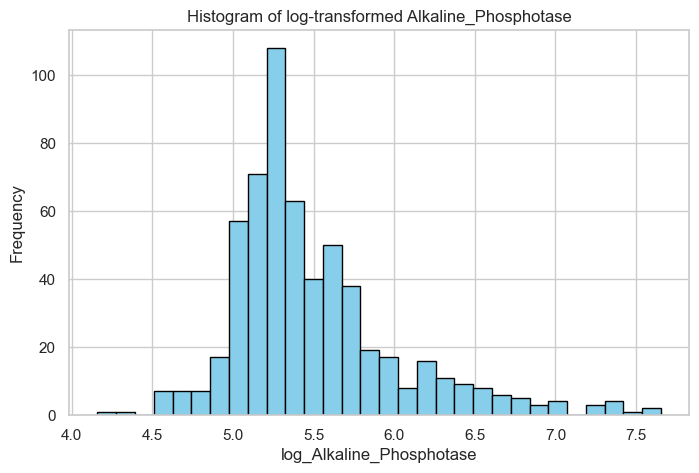

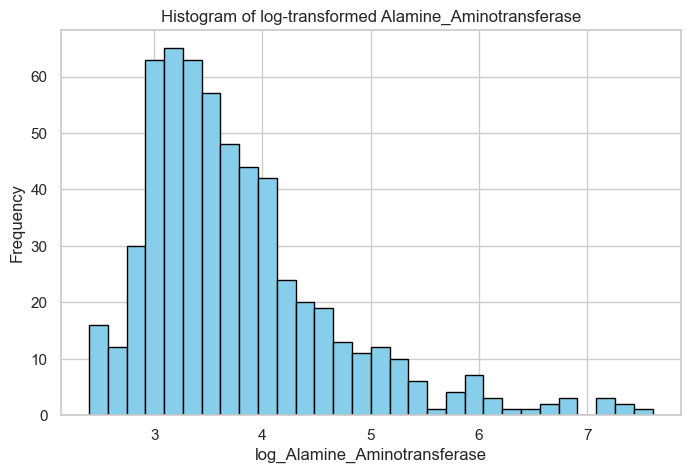

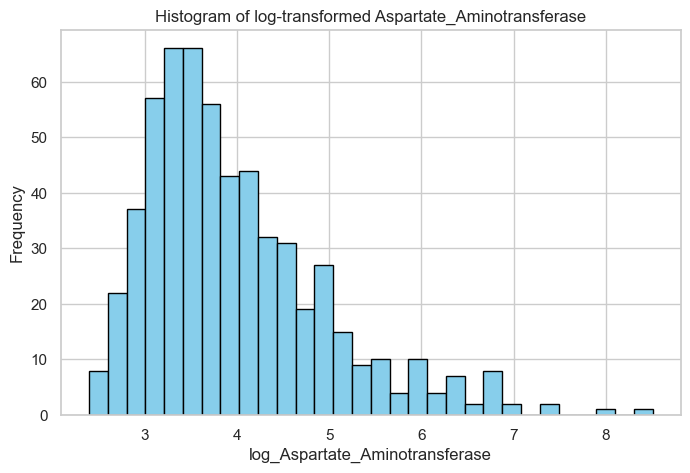

In [57]:
# List of columns to apply log transformation (these are typically right-skewed in liver disease data)
skewed_columns = [
    'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
    'Alamine_Aminotransferase', 'Aspartate_Aminotransferase'
]

# Apply log transformation to each skewed column, using log(x + 1) to handle any potential zeros
for column in skewed_columns:
    df[f'log_{column}'] = np.log(df[column] + 1)

# Visualize the distribution after log transformation
for column in skewed_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[f'log_{column}'].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of log-transformed {column}')
    plt.xlabel(f'log_{column}')
    plt.ylabel('Frequency')
    plt.show()

### 5.4) Handling Imbalanced Data
Class Imbalance: The dataset was imbalanced with a higher number of liver disease cases. SMOTE (Synthetic Minority Oversampling Technique) was applied to balance the classes, and its impact on model performance was evaluated.

# 6. Modeling

### 6.1 Model Selection and Evaluation
The following models were tested:

* Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting

Each model was evaluated using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

def train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=False):
    # Apply SMOTE if specified
    if use_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    
    # Train RandomForest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Make predictions and calculate probabilities
    y_pred = rf_model.predict(X_test)
    y_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    auc_roc = roc_auc_score(y_test, y_proba)
    return report, auc_roc

# Split data
X = df.drop('Dataset', axis=1)
y = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate without SMOTE
report_no_smote, auc_no_smote = train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=False)
print("Without SMOTE")
print(report_no_smote)
print("AUC-ROC:", auc_no_smote)

# Evaluate with SMOTE
report_smote, auc_smote = train_and_evaluate(X_train, y_train, X_test, y_test, use_smote=True)
print("\nWith SMOTE")
print(report_smote)
print("AUC-ROC:", auc_smote)


Without SMOTE
{'0': {'precision': 0.4230769230769231, 'recall': 0.36666666666666664, 'f1-score': 0.3928571428571428, 'support': 30}, '1': {'precision': 0.7912087912087912, 'recall': 0.8275862068965517, 'f1-score': 0.8089887640449438, 'support': 87}, 'accuracy': 0.7094017094017094, 'macro avg': {'precision': 0.6071428571428571, 'recall': 0.5971264367816091, 'f1-score': 0.6009229534510433, 'support': 117}, 'weighted avg': {'precision': 0.6968160045083122, 'recall': 0.7094017094017094, 'f1-score': 0.702288348355764, 'support': 117}}
AUC-ROC: 0.7812260536398469

With SMOTE
{'0': {'precision': 0.45714285714285713, 'recall': 0.5333333333333333, 'f1-score': 0.4923076923076923, 'support': 30}, '1': {'precision': 0.8292682926829268, 'recall': 0.7816091954022989, 'f1-score': 0.8047337278106508, 'support': 87}, 'accuracy': 0.717948717948718, 'macro avg': {'precision': 0.643205574912892, 'recall': 0.6574712643678161, 'f1-score': 0.6485207100591716, 'support': 117}, 'weighted avg': {'precision': 0.

In [63]:
# Split data into features (X) and target (y)
X = df.drop('Dataset', axis=1)
y = df['Dataset']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForest model for feature importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importances)


Feature Importance:
                                 Importance
log_Alkaline_Phosphotase          0.092867
Alkaline_Phosphotase              0.088371
Age                               0.087493
log_Aspartate_Aminotransferase    0.077372
Alamine_Aminotransferase          0.077205
log_Alamine_Aminotransferase      0.076613
Aspartate_Aminotransferase        0.074065
Albumin                           0.072758
Total_Protiens                    0.064848
Total_Bilirubin                   0.062532
log_Total_Bilirubin               0.056654
Albumin_and_Globulin_Ratio        0.054890
log_Direct_Bilirubin              0.051533
Direct_Bilirubin                  0.047269
Gender                            0.015530


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    results[model_name] = {
        'Report': classification_report(y_test, y_pred, output_dict=True),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

# Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(metrics['Report'])
    print(f"AUC-ROC Score: {metrics['AUC-ROC']}")



Model: Logistic Regression
{'1.0': {'precision': 0.79, 'recall': 0.9080459770114943, 'f1-score': 0.8449197860962566, 'support': 87}, '2.0': {'precision': 0.5294117647058824, 'recall': 0.3, 'f1-score': 0.3829787234042553, 'support': 30}, 'accuracy': 0.7521367521367521, 'macro avg': {'precision': 0.6597058823529411, 'recall': 0.6040229885057471, 'f1-score': 0.613949254750256, 'support': 117}, 'weighted avg': {'precision': 0.7231825037707391, 'recall': 0.7521367521367521, 'f1-score': 0.7264733597649743, 'support': 117}}
AUC-ROC Score: 0.8191570881226053

Model: Decision Tree
{'1.0': {'precision': 0.8461538461538461, 'recall': 0.7586206896551724, 'f1-score': 0.8, 'support': 87}, '2.0': {'precision': 0.46153846153846156, 'recall': 0.6, 'f1-score': 0.5217391304347826, 'support': 30}, 'accuracy': 0.717948717948718, 'macro avg': {'precision': 0.6538461538461539, 'recall': 0.6793103448275861, 'f1-score': 0.6608695652173913, 'support': 117}, 'weighted avg': {'precision': 0.7475345167652859, 're

In [67]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for balancing classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


### 6.2 Final Model: Random Forest Classifier

* Feature Importance: The Random Forest model provided feature importance, revealing that Alkaline Phosphatase, Total Bilirubin, and Aspartate Aminotransferase were strong predictors of liver disease.
* Confusion Matrix: The Random Forest model's confusion matrix indicated good performance in identifying non-diseased cases, with room for improvement in detecting disease cases.

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Example using RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC-ROC Score: {auc_roc}")


Precision: 0.7912087912087912
Recall: 0.8275862068965517
F1-Score: 0.8089887640449438
AUC-ROC Score: 0.7812260536398468


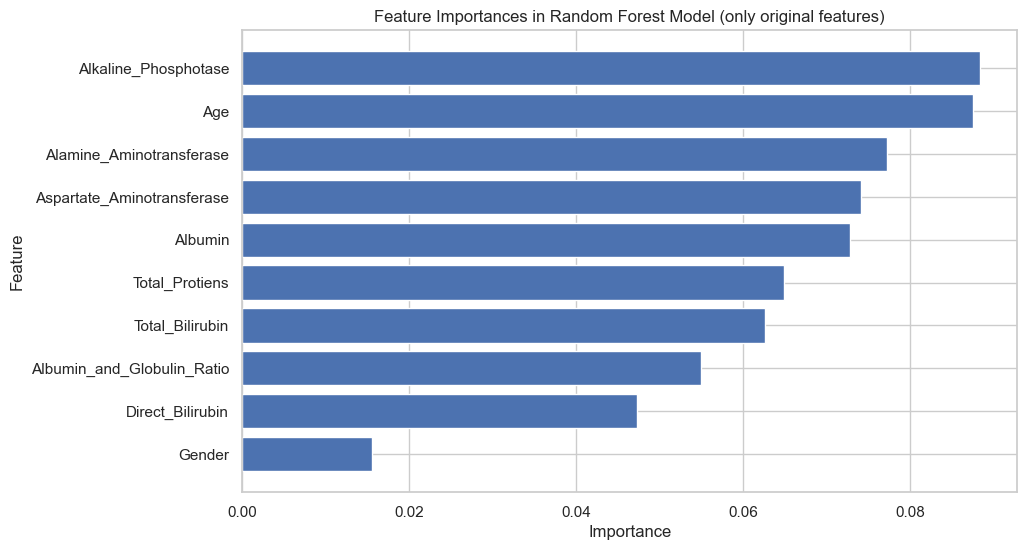

In [72]:

# Fit the model and get feature importances
rf_model.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Filter to exclude features with 'log_' in their names
feature_importances_filtered = feature_importances[~feature_importances['Feature'].str.contains('log_')]

# Plot filtered feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_filtered['Feature'], feature_importances_filtered['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model (only original features)')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()



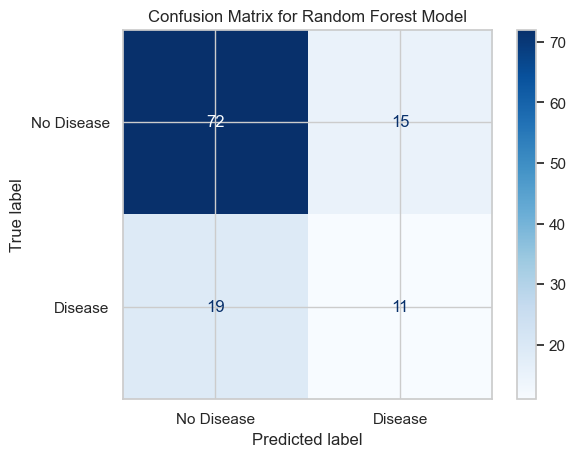

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming rf_model is the chosen model after comparison
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


# 7. Model Evaluation

### 7.1) Evaluation Metrics

Without SMOTE:
* Accuracy: 70.9%
* AUC-ROC: 0.78
* Higher precision for detecting disease cases but lower recall.

With SMOTE:
* Accuracy: 71.8%
* AUC-ROC: 0.77
* Improved recall for disease cases, showing SMOTE’s benefit in reducing false negatives.



### 7.2) Confusion Matrix Interpretation

The confusion matrix highlighted that:

The model performs well on non-diseased cases (high true negatives).
It has room to improve in detecting diseased cases (reduce false negatives), which is crucial in a medical context to avoid missed diagnoses.

### 7.3) Feature Importance Visualization
A bar plot of feature importances showed the key predictors in the Random Forest model. This visualization provides insight into which health metrics most influence the prediction of liver disease, helping medical professionals understand the factors driving the model's decisions.

# 8. Conclusion and Next Steps

## Summary
The Random Forest model achieved an AUC-ROC of 0.78, showing that it can effectively differentiate between patients with and without liver disease. The inclusion of SMOTE improved recall for diseased cases, an essential consideration for healthcare applications where missed diagnoses carry risks.

## Recommendations for Future Work
* Hyperparameter Tuning: Further tuning of the Random Forest model and other ensemble methods like Gradient Boosting could improve accuracy and recall.
* Alternative Models: Testing additional algorithms, such as XGBoost or SVM, might enhance performance.
* Improved Feature Engineering: Additional domain-specific features, such as combining liver function metrics into composite scores, may provide better predictive power.
* Address Class Imbalance: While SMOTE helped improve recall, exploring other methods, such as focal loss, could further enhance performance.